In [1]:
import os
from generator import ImageMaskGenerator

from config import (
    BATCH_SIZE, DATA_GEN_ARGS, IMAGE_COLORMODE, MASK_COLORMODE,
    PCA_COLOR_RANGE, TARGET_SIZE, SAMPLE_SIZE)

C:\Users\owner\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
dataset_dir = '../dataset'
customGen = ImageMaskGenerator(batch_size=2,
                               dataset_dir=dataset_dir,
                               folder='train',
                               aug_dict=DATA_GEN_ARGS,
                               image_colormode=IMAGE_COLORMODE,
                               mask_colormode=MASK_COLORMODE,
                               target_size=TARGET_SIZE,
                               sample_size=SAMPLE_SIZE,
                               shuffle=True)

In [6]:
images, masks = customGen.__next__()

In [41]:

def resampling(image, mask, image_colormode, mask_colormode):
    h = image.shape[0]
    w = image.shape[1]
    
    upperleft = (np.random.randint(0, h-SAMPLE_SIZE[0]+1), np.random.randint(0, w-SAMPLE_SIZE[1]+1))
    
    image = image[upperleft[0]:upperleft[0]+SAMPLE_SIZE[0], upperleft[1]:upperleft[1]+SAMPLE_SIZE[1], :]
    mask = mask[upperleft[0]:upperleft[0]+SAMPLE_SIZE[0], upperleft[1]:upperleft[1]+SAMPLE_SIZE[1], :]
    
    return image, mask


image = images[0,:,:,:]
mask = masks[0,:,:,:]

image2, mask2 = resampling(image, mask, IMAGE_COLORMODE, MASK_COLORMODE)

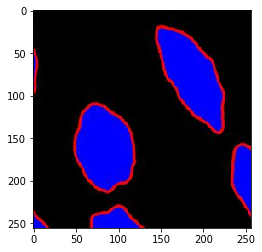

In [56]:
plt.imshow(mask2.reshape((256,256,3)))

In [47]:
image2.shape

(256, 256, 1)

In [49]:
image.shape

(768, 768, 1)

In [45]:
import numpy as np
import matplotlib.pyplot as plt